In [65]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [159]:
df = pd.read_csv('E:\SnehaWork\AIProject\Dataset\Customer-Churn.csv')
df.columns[df.isna().any()].tolist() 

[]

In [67]:
Churned = df[df.Churn == 'Yes']
NonChurned = df[df.Churn == 'No']

number_of_Churned = len(Churned)
number_of_NonChurned = len(NonChurned)

Churned_percentage = round((number_of_Churned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
valid_percentage = round((number_of_NonChurned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
print(number_of_NonChurned,number_of_Churned)
#df.columns.tolist()

5174 1869


In [63]:
#df.dtypes
#count yes and no on base data, train and test

In [69]:
df.drop('customerID',axis='columns',inplace=True)

In [70]:
#error='coerce' ignores the errors. Conversion for all except for error values i.e. empty spaces. 
#.isnull() gives columns which have empty spaces
#shows the data which has TotalCharges as null. Good to drop these
df.columns[df.isnull().any()].tolist() 
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [71]:
#Drop rows with TotalCharges as null

df1 = df[df.TotalCharges!=' ']

In [72]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [74]:
#replace Yes/No to 1/0 since ML doesn't understand text

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [75]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [76]:
#One hot encoding for multiclass i.e. InternetService, Contract, PaymentMethod

multiclass_col=['InternetService', 'Contract', 'PaymentMethod']
df1 = pd.get_dummies(data=df1,columns=multiclass_col)

In [77]:
#scaling the values between 1 and 0 for below
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

#MinMaxScaler scales the data between 0 and 1
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [78]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [79]:
print_unique_col_values(df1)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [149]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [150]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [151]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [152]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15)
#X_val.shape

ValueError: Found input variables with inconsistent numbers of samples: [8260, 10326]

In [153]:
# Number of classes in training Data
y_val.value_counts()

1    851
0    801
Name: Churn, dtype: int64

In [85]:
num_of_cols = len(x.columns)
num_of_cols

26

In [156]:
X_train=X_train.values.reshape(X_train.shape[0],num_of_cols, 1).astype('float32') 
X_test=X_test.values.reshape(X_test.shape[0],num_of_cols, 1).astype('float32')
#X_val=X_val.values.reshape(X_val.shape[0],num_of_cols, 1).astype('float32')

#sometimes works as X_val.values.reshape(X_val.shape[0],26, 1).astype('float32')

In [135]:
X_test.shape


(2066, 26, 1)

In [157]:
Name = "CNN_{}".format(int(time.time())) 
log_dir="E:\\SnehaWork\\AIProject\\TF_Logs\\{}".format(Name)
cnn = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(26,1)),  
    layers.MaxPooling1D(pool_size=3),
    
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=3),
    
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#cnn.summary()
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0)

cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=300,validation_split=0.2, batch_size=375,callbacks=[tb_callback])

Train on 6608 samples, validate on 1652 samples
Epoch 1/300
6608/6608 [==============================] - 3s 421us/sample - loss: 0.6558 - accuracy: 0.6662 - val_loss: 0.6090 - val_accuracy: 0.7094
Epoch 2/300
6608/6608 [==============================] - 1s 188us/sample - loss: 0.5638 - accuracy: 0.7377 - val_loss: 0.5475 - val_accuracy: 0.7167
Epoch 3/300
6608/6608 [==============================] - 1s 186us/sample - loss: 0.5228 - accuracy: 0.7461 - val_loss: 0.5209 - val_accuracy: 0.7361
Epoch 4/300
6608/6608 [==============================] - 1s 178us/sample - loss: 0.5131 - accuracy: 0.7556 - val_loss: 0.5136 - val_accuracy: 0.7439
Epoch 5/300
6608/6608 [==============================] - 1s 184us/sample - loss: 0.5051 - accuracy: 0.7588 - val_loss: 0.5048 - val_accuracy: 0.7464
Epoch 6/300
6608/6608 [==============================] - 1s 201us/sample - loss: 0.4972 - accuracy: 0.7586 - val_loss: 0.5014 - val_accuracy: 0.7494
Epoch 7/300
6608/6608 [==============================] - 1

Epoch 54/300
6608/6608 [==============================] - 1s 185us/sample - loss: 0.4199 - accuracy: 0.8015 - val_loss: 0.4579 - val_accuracy: 0.7887
Epoch 55/300
6608/6608 [==============================] - 1s 178us/sample - loss: 0.4154 - accuracy: 0.8078 - val_loss: 0.4582 - val_accuracy: 0.7791
Epoch 56/300
6608/6608 [==============================] - 1s 172us/sample - loss: 0.4131 - accuracy: 0.8061 - val_loss: 0.4567 - val_accuracy: 0.7839
Epoch 57/300
6608/6608 [==============================] - 1s 188us/sample - loss: 0.4118 - accuracy: 0.8083 - val_loss: 0.4581 - val_accuracy: 0.7851
Epoch 58/300
6608/6608 [==============================] - 1s 200us/sample - loss: 0.4224 - accuracy: 0.8025 - val_loss: 0.4575 - val_accuracy: 0.7869
Epoch 59/300
6608/6608 [==============================] - 1s 184us/sample - loss: 0.4107 - accuracy: 0.8067 - val_loss: 0.4572 - val_accuracy: 0.7869
Epoch 60/300
6608/6608 [==============================] - 1s 182us/sample - loss: 0.4100 - accuracy:

6608/6608 [==============================] - 1s 173us/sample - loss: 0.3669 - accuracy: 0.8355 - val_loss: 0.4625 - val_accuracy: 0.7839
Epoch 109/300
6608/6608 [==============================] - 1s 172us/sample - loss: 0.3619 - accuracy: 0.8350 - val_loss: 0.4602 - val_accuracy: 0.7954
Epoch 110/300
6608/6608 [==============================] - 1s 187us/sample - loss: 0.3630 - accuracy: 0.8344 - val_loss: 0.4766 - val_accuracy: 0.7645
Epoch 111/300
6608/6608 [==============================] - 1s 198us/sample - loss: 0.3750 - accuracy: 0.8287 - val_loss: 0.4630 - val_accuracy: 0.7972
Epoch 112/300
6608/6608 [==============================] - 1s 172us/sample - loss: 0.3607 - accuracy: 0.8372 - val_loss: 0.4555 - val_accuracy: 0.7942
Epoch 113/300
6608/6608 [==============================] - 1s 187us/sample - loss: 0.3554 - accuracy: 0.8420 - val_loss: 0.4516 - val_accuracy: 0.8015
Epoch 114/300
6608/6608 [==============================] - 1s 179us/sample - loss: 0.3522 - accuracy: 0.8406

6608/6608 [==============================] - 1s 181us/sample - loss: 0.3156 - accuracy: 0.8649 - val_loss: 0.4614 - val_accuracy: 0.8069
Epoch 163/300
6608/6608 [==============================] - 1s 202us/sample - loss: 0.3122 - accuracy: 0.8676 - val_loss: 0.4532 - val_accuracy: 0.8027
Epoch 164/300
6608/6608 [==============================] - 1s 192us/sample - loss: 0.3102 - accuracy: 0.8652 - val_loss: 0.4579 - val_accuracy: 0.8027
Epoch 165/300
6608/6608 [==============================] - 1s 179us/sample - loss: 0.3123 - accuracy: 0.8702 - val_loss: 0.4638 - val_accuracy: 0.7990
Epoch 166/300
6608/6608 [==============================] - 1s 180us/sample - loss: 0.3168 - accuracy: 0.8620 - val_loss: 0.4531 - val_accuracy: 0.8057
Epoch 167/300
6608/6608 [==============================] - 1s 207us/sample - loss: 0.3088 - accuracy: 0.8691 - val_loss: 0.4563 - val_accuracy: 0.8015
Epoch 168/300
6608/6608 [==============================] - 1s 179us/sample - loss: 0.3059 - accuracy: 0.8741

6608/6608 [==============================] - 1s 198us/sample - loss: 0.2806 - accuracy: 0.8854 - val_loss: 0.4608 - val_accuracy: 0.8136
Epoch 217/300
6608/6608 [==============================] - 1s 187us/sample - loss: 0.2739 - accuracy: 0.8904 - val_loss: 0.4700 - val_accuracy: 0.7869
Epoch 218/300
6608/6608 [==============================] - 1s 190us/sample - loss: 0.2934 - accuracy: 0.8755 - val_loss: 0.4609 - val_accuracy: 0.8069
Epoch 219/300
6608/6608 [==============================] - 1s 186us/sample - loss: 0.2819 - accuracy: 0.8842 - val_loss: 0.4926 - val_accuracy: 0.8087
Epoch 220/300
6608/6608 [==============================] - 1s 212us/sample - loss: 0.2819 - accuracy: 0.8823 - val_loss: 0.4685 - val_accuracy: 0.8045
Epoch 221/300
6608/6608 [==============================] - 1s 175us/sample - loss: 0.2744 - accuracy: 0.8876 - val_loss: 0.4612 - val_accuracy: 0.8015
Epoch 222/300
6608/6608 [==============================] - 1s 186us/sample - loss: 0.2798 - accuracy: 0.8844

6608/6608 [==============================] - 1s 180us/sample - loss: 0.2616 - accuracy: 0.8939 - val_loss: 0.5535 - val_accuracy: 0.8063
Epoch 271/300
6608/6608 [==============================] - 1s 180us/sample - loss: 0.2821 - accuracy: 0.8762 - val_loss: 0.5084 - val_accuracy: 0.8136
Epoch 272/300
6608/6608 [==============================] - 1s 181us/sample - loss: 0.2637 - accuracy: 0.8919 - val_loss: 0.4978 - val_accuracy: 0.7815
Epoch 273/300
6608/6608 [==============================] - 1s 199us/sample - loss: 0.2676 - accuracy: 0.8874 - val_loss: 0.4846 - val_accuracy: 0.7754
Epoch 274/300
6608/6608 [==============================] - 1s 184us/sample - loss: 0.2577 - accuracy: 0.8903 - val_loss: 0.4990 - val_accuracy: 0.8008
Epoch 275/300
6608/6608 [==============================] - 1s 193us/sample - loss: 0.2541 - accuracy: 0.8986 - val_loss: 0.4836 - val_accuracy: 0.8093
Epoch 276/300
6608/6608 [==============================] - 1s 194us/sample - loss: 0.2516 - accuracy: 0.8938

In [158]:
cnn.evaluate(X_test,y_test,batch_size=375)

2066/2066 [==============================] - 0s 55us/sample - loss: 0.4899 - accuracy: 0.8132


[0.489886263116747, 0.81316555]

### type(X_test)

In [139]:
yp_pred= cnn.predict(X_test)
#X_test.isnull()

In [140]:
yp_pred = np.round(yp_pred)

In [141]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, yp_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      1033
           1       0.75      0.90      0.82      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[722, 311],
       [102, 931]])>

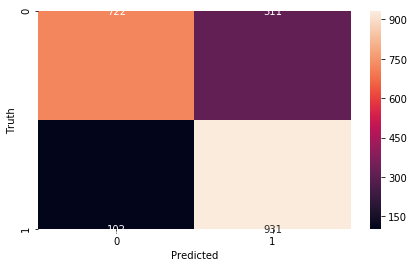

In [142]:
tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)

In [146]:
%reload_ext tensorboard
%tensorboard --logdir log_dir
#taskkill /F /PID 101312

Reusing TensorBoard on port 6006 (pid 10312), started 0:01:34 ago. (Use '!kill 10312' to kill it.)